In [1]:
# budget_data_updated_new.xlsx

In [2]:
!pip install darts

  Using cached darts-0.19.0-py3-none-any.whl (370 kB)
  Using cached nfoursid-1.0.0-py3-none-any.whl (16 kB)
  Using cached prophet-1.0.1.tar.gz (65 kB)

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\avitr\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\avitr\\AppData\\Local\\Temp\\pip-install-4ypqc1ax\\prophet_fa0a90dfdd734b1ca483adedf2d16968\\setup.py'"'"'; __file__='"'"'C:\\Users\\avitr\\AppData\\Local\\Temp\\pip-install-4ypqc1ax\\prophet_fa0a90dfdd734b1ca483adedf2d16968\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\avitr\AppData\Local\Temp\pip-wheel-a20saxfl'
       cwd: C:\Users\avitr\AppData\Local\Temp\pip-install-4ypqc1ax\prophet_fa0a90dfdd734b1ca483adedf2d16968\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\li


  Running setup.py clean for prophet
Failed to build prophet
    Running setup.py install for prophet: started
    Running setup.py install for prophet: finished with status 'error'


In [2]:
# learning curve, fitting,feature importance. rmse,mse, etc..
# 
import matplotlib.pyplot as plt
import pandas as pd
# https://www.kaggle.com/code/rtatman/lightgbm-hyperparameter-optimisation-lb-0-761/notebook
import xgboost as xgb
import lightgbm as lgb
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)   
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

C:\Users\avitr\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\avitr\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\avitr\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\avitr\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be remove

In [3]:
def performance(d):
    true = d[list(d)[0]].values
    pred = d[list(d)[1]].values
    
    rmse = mean_squared_error(true, pred, squared=False)
    mse = mean_squared_error(true, pred, squared=True)
    
    print('RMSE:',rmse)
    print('MSE:',mse)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def feature_importances(clf):
    # sorted(zip(clf.feature_importances_, X.columns), reverse=True)
    feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,all_cols)), columns=['Value','Feature'])

    plt.figure(figsize=(20, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()
# plt.savefig('lgbm_importances-01.png')

In [5]:
df = pd.read_excel('budget_data_updated_new.xlsx')
df = df.set_index('cif')
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,GENDER_DESC,SALARY,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,CUST_SEGMENT_BAL,SAL_AMOUNT
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135017716,2021-04-30,2,2,1,0,0.000,0.00,0.00,3.100,0.000,0.000,0.000,0.000,0.000,Male,0.0,1. Less than 500,42.3,6. 40-50,1,2,3164.704086,1,1,1,0,20,483.815,4,3,1,2. Smart Saver,0.000
135018553,2021-04-30,1,3,2,0,73.570,0.00,0.00,8.500,114.480,2.540,373.110,25.030,0.000,Male,0.0,1. Less than 500,34.8,5. 30-40,1,3,72.532000,0,1,0,0,20,319.490,7,2,1,2. Smart Saver,0.000
135018688,2021-04-30,1,1,3,0,241.220,25.00,0.00,35.005,130.690,618.025,10364.298,295.725,170.026,Male,0.0,1. Less than 500,36.8,5. 30-40,1,2,0.138000,1,1,1,0,0,0.000,7,3,2,1. Inactive,0.000
1109816,2021-04-30,1,5,0,6,301.408,116.63,8.80,240.000,70.745,57.050,373.290,0.000,280.000,Male,1148.0,5. 2000-5000,42.3,6. 40-50,1,1,30.580999,0,1,1,1,33,1523.923,2,2,2,1. Basic Saver,3081.486
1109819,2021-04-30,1,2,1,6,14.510,0.00,23.35,92.950,84.350,224.800,143.450,0.000,322.870,Male,1272.0,4. 1500-2000,28.5,4. 21-30,1,2,3894.737061,1,1,0,1,16,811.630,5,3,2,2. Smart Saver,1729.686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275477,2021-12-31,1,4,0,0,0.000,0.00,0.00,5.000,5.500,0.000,6.000,0.000,70.000,Male,0.0,1. Less than 500,15.9,2. 14-18,1,1,0.175000,0,0,0,0,6,26.655,1,1,1,1. Inactive,0.000
1275504,2021-12-31,2,5,0,0,22.965,14.50,12.00,0.000,111.290,14.350,97.000,9.500,210.000,Male,0.0,1. Less than 500,30.7,5. 30-40,1,1,325.201996,0,0,0,0,74,361.755,1,1,1,2. Smart Saver,0.000
1400000,2021-12-31,1,2,4,6,256.205,15.00,5.00,0.000,127.700,33.350,127.870,249.900,600.450,Male,2524.0,6. 5000+,62.9,8. >=60,1,3,3910.292110,1,1,1,1,10,379.050,8,3,2,2. Smart Saver,10276.337


In [6]:
cols = ['date', 'nationality', 'customer_category', 'NO_OF_ALL_CC', 'NO_OF_SAL_HITS',
        
'GENDER_DESC', 'SALARY',
        
'CUST_SALARY_RANGE_TIER', 'CUST_AGE', 'CUST_AGE_TIER', 'CUST_STATUS_TIER', 'NO_OF_ALL_ACC', 
        
'IS_CUST_HOLDING_PF', 'IS_CUST_HOLDING_CC', 'IS_CUST_HOLDING_PRE_PAID', 
        
'IS_CUST_WITH_SAL_TRF', 'NO_OF_POS_TXS', 'NO_OF_ALL_PRODUCTS', 'NO_OF_ALL_PRODUCT_CATEGORIES',
        
'CUST_SECTOR_TIER', 'CUST_SEGMENT_BAL',
'Groceries', 'Transportation', 'Health', 'Utilities', 'DiningOut', 'BillsAndServices', 'Shopping', 'Entertainment','MoneyTransfer']

In [7]:
df = df[cols]
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,SALARY,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135017716,2021-04-30,2,2,1,0,Male,0.0,1. Less than 500,42.3,6. 40-50,1,2,1,1,1,0,20,4,3,1,2. Smart Saver,0.000,0.00,0.00,3.100,0.000,0.000,0.000,0.000,0.000
135018553,2021-04-30,1,3,2,0,Male,0.0,1. Less than 500,34.8,5. 30-40,1,3,0,1,0,0,20,7,2,1,2. Smart Saver,73.570,0.00,0.00,8.500,114.480,2.540,373.110,25.030,0.000
135018688,2021-04-30,1,1,3,0,Male,0.0,1. Less than 500,36.8,5. 30-40,1,2,1,1,1,0,0,7,3,2,1. Inactive,241.220,25.00,0.00,35.005,130.690,618.025,10364.298,295.725,170.026
1109816,2021-04-30,1,5,0,6,Male,1148.0,5. 2000-5000,42.3,6. 40-50,1,1,0,1,1,1,33,2,2,2,1. Basic Saver,301.408,116.63,8.80,240.000,70.745,57.050,373.290,0.000,280.000
1109819,2021-04-30,1,2,1,6,Male,1272.0,4. 1500-2000,28.5,4. 21-30,1,2,1,1,0,1,16,5,3,2,2. Smart Saver,14.510,0.00,23.35,92.950,84.350,224.800,143.450,0.000,322.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275477,2021-12-31,1,4,0,0,Male,0.0,1. Less than 500,15.9,2. 14-18,1,1,0,0,0,0,6,1,1,1,1. Inactive,0.000,0.00,0.00,5.000,5.500,0.000,6.000,0.000,70.000
1275504,2021-12-31,2,5,0,0,Male,0.0,1. Less than 500,30.7,5. 30-40,1,1,0,0,0,0,74,1,1,1,2. Smart Saver,22.965,14.50,12.00,0.000,111.290,14.350,97.000,9.500,210.000
1400000,2021-12-31,1,2,4,6,Male,2524.0,6. 5000+,62.9,8. >=60,1,3,1,1,1,1,10,8,3,2,2. Smart Saver,256.205,15.00,5.00,0.000,127.700,33.350,127.870,249.900,600.450


In [8]:
df['CUST_SALARY_RANGE_TIER'].value_counts()

3. 1000-1500        42782
2. 500-1000         32700
4. 1500-2000        29465
5. 2000-5000        27927
1. Less than 500    20259
6. 5000+             1742
01. Unknown            57
Name: CUST_SALARY_RANGE_TIER, dtype: int64

In [9]:
df_n  = df.query('CUST_SALARY_RANGE_TIER == "01. Unknown" or CUST_SALARY_RANGE_TIER == "6. 5000+"')
df_n 

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,SALARY,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1009661,2021-04-30,1,2,2,6,Male,5891.0,6. 5000+,44.4,6. 40-50,1,4,1,1,1,1,44,12,3,2,1. Basic Saver,83.235,39.000,44.050,0.31,0.000,1025.90,2844.750,0.000,14370.00
1042995,2021-04-30,1,2,1,6,Female,1823.0,6. 5000+,42.8,6. 40-50,1,1,1,1,0,1,31,4,3,2,1. Basic Saver,437.860,8.500,60.000,282.00,7.000,10.50,1202.650,12.500,1835.13
1038921,2021-04-30,1,2,2,6,Male,6843.0,6. 5000+,48.6,6. 40-50,1,2,1,1,1,1,38,6,3,2,2. Smart Saver,304.520,195.150,35.000,147.00,232.885,27.72,964.650,0.000,1543.70
1040440,2021-04-30,1,2,1,6,Male,3188.0,6. 5000+,41.8,6. 40-50,1,3,1,1,1,1,14,7,3,2,2. Smart Saver,386.110,0.000,42.135,0.00,0.000,0.00,191.800,0.000,1643.00
1116161,2021-04-30,1,2,2,6,Male,4244.0,6. 5000+,51.2,7. 50-60,1,3,1,1,1,1,33,8,3,2,2. Smart Saver,80.060,13.500,139.280,0.00,59.500,95.06,350.050,0.000,1376.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264793,2021-12-31,1,1,1,0,Male,6000.0,6. 5000+,45.4,6. 40-50,1,5,0,1,0,0,0,6,3,1,3. Long Term Planner,16.450,0.000,14.000,3.00,183.500,0.00,655.843,437.641,0.00
1268344,2021-12-31,1,2,2,6,Male,2955.0,6. 5000+,32.9,5. 30-40,1,2,1,1,1,1,34,7,3,2,2. Smart Saver,63.285,144.115,106.890,50.16,40.600,6.40,328.420,280.000,2000.30
1269606,2021-12-31,1,2,0,2,Male,1200.0,6. 5000+,46.0,6. 40-50,1,1,0,0,0,1,41,1,1,2,2. Smart Saver,106.555,0.000,0.000,136.50,0.000,992.95,3071.100,0.000,4837.00


In [10]:
df = df[~df['CUST_SALARY_RANGE_TIER'].isin(['01. Unknown','6. 5000+'])]
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,SALARY,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135017716,2021-04-30,2,2,1,0,Male,0.0,1. Less than 500,42.3,6. 40-50,1,2,1,1,1,0,20,4,3,1,2. Smart Saver,0.000,0.00,0.00,3.100,0.000,0.000,0.000,0.000,0.000
135018553,2021-04-30,1,3,2,0,Male,0.0,1. Less than 500,34.8,5. 30-40,1,3,0,1,0,0,20,7,2,1,2. Smart Saver,73.570,0.00,0.00,8.500,114.480,2.540,373.110,25.030,0.000
135018688,2021-04-30,1,1,3,0,Male,0.0,1. Less than 500,36.8,5. 30-40,1,2,1,1,1,0,0,7,3,2,1. Inactive,241.220,25.00,0.00,35.005,130.690,618.025,10364.298,295.725,170.026
1109816,2021-04-30,1,5,0,6,Male,1148.0,5. 2000-5000,42.3,6. 40-50,1,1,0,1,1,1,33,2,2,2,1. Basic Saver,301.408,116.63,8.80,240.000,70.745,57.050,373.290,0.000,280.000
1109819,2021-04-30,1,2,1,6,Male,1272.0,4. 1500-2000,28.5,4. 21-30,1,2,1,1,0,1,16,5,3,2,2. Smart Saver,14.510,0.00,23.35,92.950,84.350,224.800,143.450,0.000,322.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275431,2021-12-31,2,5,0,1,Male,750.0,2. 500-1000,38.7,5. 30-40,1,1,0,0,0,0,15,1,1,1,2. Smart Saver,0.000,0.00,0.00,20.500,0.000,0.000,0.000,0.000,591.250
1275477,2021-12-31,1,4,0,0,Male,0.0,1. Less than 500,15.9,2. 14-18,1,1,0,0,0,0,6,1,1,1,1. Inactive,0.000,0.00,0.00,5.000,5.500,0.000,6.000,0.000,70.000
1275504,2021-12-31,2,5,0,0,Male,0.0,1. Less than 500,30.7,5. 30-40,1,1,0,0,0,0,74,1,1,1,2. Smart Saver,22.965,14.50,12.00,0.000,111.290,14.350,97.000,9.500,210.000


In [11]:
def f(x):
    if 'Less' in x:
        return (0 + int(x.split()[-1]))/2
    else:
        y = x.split()[-1]
        y = y.split('-')
        y = int(y[0]) + int(y[1])
        return y/2

In [12]:
df['Salary_temp'] = df['CUST_SALARY_RANGE_TIER'].apply(lambda x: f(x))
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,SALARY,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,Salary_temp
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135017716,2021-04-30,2,2,1,0,Male,0.0,1. Less than 500,42.3,6. 40-50,1,2,1,1,1,0,20,4,3,1,2. Smart Saver,0.000,0.00,0.00,3.100,0.000,0.000,0.000,0.000,0.000,250.0
135018553,2021-04-30,1,3,2,0,Male,0.0,1. Less than 500,34.8,5. 30-40,1,3,0,1,0,0,20,7,2,1,2. Smart Saver,73.570,0.00,0.00,8.500,114.480,2.540,373.110,25.030,0.000,250.0
135018688,2021-04-30,1,1,3,0,Male,0.0,1. Less than 500,36.8,5. 30-40,1,2,1,1,1,0,0,7,3,2,1. Inactive,241.220,25.00,0.00,35.005,130.690,618.025,10364.298,295.725,170.026,250.0
1109816,2021-04-30,1,5,0,6,Male,1148.0,5. 2000-5000,42.3,6. 40-50,1,1,0,1,1,1,33,2,2,2,1. Basic Saver,301.408,116.63,8.80,240.000,70.745,57.050,373.290,0.000,280.000,3500.0
1109819,2021-04-30,1,2,1,6,Male,1272.0,4. 1500-2000,28.5,4. 21-30,1,2,1,1,0,1,16,5,3,2,2. Smart Saver,14.510,0.00,23.35,92.950,84.350,224.800,143.450,0.000,322.870,1750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275431,2021-12-31,2,5,0,1,Male,750.0,2. 500-1000,38.7,5. 30-40,1,1,0,0,0,0,15,1,1,1,2. Smart Saver,0.000,0.00,0.00,20.500,0.000,0.000,0.000,0.000,591.250,750.0
1275477,2021-12-31,1,4,0,0,Male,0.0,1. Less than 500,15.9,2. 14-18,1,1,0,0,0,0,6,1,1,1,1. Inactive,0.000,0.00,0.00,5.000,5.500,0.000,6.000,0.000,70.000,250.0
1275504,2021-12-31,2,5,0,0,Male,0.0,1. Less than 500,30.7,5. 30-40,1,1,0,0,0,0,74,1,1,1,2. Smart Saver,22.965,14.50,12.00,0.000,111.290,14.350,97.000,9.500,210.000,250.0


In [13]:
outputs = ['Groceries', 'Transportation', 'Health', 'Utilities', 'DiningOut', 'BillsAndServices', 'Shopping', 'Entertainment','MoneyTransfer']

In [14]:
df['customer_category'].unique()

array([2, 3, 1, 5, 4], dtype=int64)

In [15]:
a = df[df['customer_category']==1]['Groceries'].mean()
a

138.58614717906784

In [16]:
df_1 = df.query('customer_category == 1')
df_1.replace(0,df_1[outputs].mean(axis=0),inplace=True)

df_2 = df.query('customer_category == 2')
df_2.replace(0,df_2[outputs].mean(axis=0),inplace=True)
df_3 = df.query('customer_category == 3')
df_3.replace(0,df_3[outputs].mean(axis=0),inplace=True)
df_4 = df.query('customer_category == 4')
df_4.replace(0,df_4[outputs].mean(axis=0),inplace=True)
df_5 = df.query('customer_category == 5')
df_5.replace(0,df_5[outputs].mean(axis=0),inplace=True)
df = pd.concat([df_1,df_2,df_3,df_4])
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,SALARY,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,Salary_temp
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135018688,2021-04-30,1,1,3,0,Male,0.0,1. Less than 500,36.8,5. 30-40,1,2,1,1,1,0,0,7,3,2,1. Inactive,241.220000,25.000000,105.807266,35.005000,130.690000,618.025000,10364.298000,295.725000,170.026000,250.0
135017757,2021-04-30,2,1,3,0,Male,0.0,1. Less than 500,37.4,5. 30-40,1,2,1,1,1,0,12,8,3,2,2. Smart Saver,161.885000,20.000000,28.000000,32.200000,22.700000,249.745410,166.800000,201.992103,1397.668991,250.0
135017850,2021-04-30,1,1,4,0,Male,0.0,1. Less than 500,40.2,6. 40-50,1,4,1,1,1,0,35,9,3,1,1. Basic Saver,55.215000,272.926650,105.807266,110.245000,78.200000,0.490000,48.606000,201.992103,1397.668991,250.0
232218140,2021-04-30,2,1,3,0,Male,0.0,1. Less than 500,45.8,6. 40-50,1,14,1,1,1,0,37,18,4,1,3. Long Term Planner,254.025000,272.926650,105.807266,410.000000,59.900000,161.136000,38.250000,201.992103,1397.668991,250.0
135018310,2021-04-30,1,1,5,0,Male,0.0,1. Less than 500,67.5,8. >=60,1,3,1,1,1,0,3,9,3,1,1. Basic Saver,132.730000,272.926650,15.350000,165.890640,40.050000,91.790000,49.000000,201.992103,1397.668991,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275267,2021-12-31,1,4,0,0,Male,0.0,1. Less than 500,22.4,4. 21-30,1,1,0,0,0,0,35,1,1,1,2. Smart Saver,3.800000,10.726212,5.000000,24.381353,29.145000,19.664379,22.500000,9.061320,48.000000,250.0
1275371,2021-12-31,2,4,0,0,Male,0.0,1. Less than 500,22.0,4. 21-30,1,1,0,0,0,0,3,1,1,1,2. Smart Saver,14.782526,10.726212,19.888706,24.381353,43.937449,19.664379,76.390023,9.061320,224.502000,250.0
1275383,2021-12-31,1,4,0,3,Male,100.0,1. Less than 500,18.3,3. 18-21,1,1,0,0,0,0,71,1,1,1,1. Inactive,3.600000,10.726212,44.250000,2.700000,117.643000,6.500000,120.890000,16.400000,353.000000,250.0


In [17]:
df['GENDER_DESC'] = df['GENDER_DESC'].replace(['Male','Female'],[1,0])

In [18]:
cols = ['customer_category', 'NO_OF_ALL_CC', 'NO_OF_SAL_HITS',
        
'GENDER_DESC','CUST_AGE',  'NO_OF_ALL_ACC', 'IS_CUST_HOLDING_PF', 'IS_CUST_HOLDING_CC', 
        
'IS_CUST_HOLDING_PRE_PAID', 'IS_CUST_WITH_SAL_TRF', 'NO_OF_POS_TXS', 
        
'NO_OF_ALL_PRODUCTS', 'NO_OF_ALL_PRODUCT_CATEGORIES', 'Salary_temp','CUST_SEGMENT_BAL',
       
'Groceries', 'Transportation', 'Health', 'Utilities', 'DiningOut', 

'BillsAndServices', 'Shopping', 'Entertainment','MoneyTransfer']

In [19]:
df = df[cols]
df

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Salary_temp,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer
cif,,,,,,,,,,,,,,,,,,,,,,,,
135018688,1,3,0,1,36.8,2,1,1,1,0,0,7,3,250.0,1. Inactive,241.220000,25.000000,105.807266,35.005000,130.690000,618.025000,10364.298000,295.725000,170.026000
135017757,1,3,0,1,37.4,2,1,1,1,0,12,8,3,250.0,2. Smart Saver,161.885000,20.000000,28.000000,32.200000,22.700000,249.745410,166.800000,201.992103,1397.668991
135017850,1,4,0,1,40.2,4,1,1,1,0,35,9,3,250.0,1. Basic Saver,55.215000,272.926650,105.807266,110.245000,78.200000,0.490000,48.606000,201.992103,1397.668991
232218140,1,3,0,1,45.8,14,1,1,1,0,37,18,4,250.0,3. Long Term Planner,254.025000,272.926650,105.807266,410.000000,59.900000,161.136000,38.250000,201.992103,1397.668991
135018310,1,5,0,1,67.5,3,1,1,1,0,3,9,3,250.0,1. Basic Saver,132.730000,272.926650,15.350000,165.890640,40.050000,91.790000,49.000000,201.992103,1397.668991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275267,4,0,0,1,22.4,1,0,0,0,0,35,1,1,250.0,2. Smart Saver,3.800000,10.726212,5.000000,24.381353,29.145000,19.664379,22.500000,9.061320,48.000000
1275371,4,0,0,1,22.0,1,0,0,0,0,3,1,1,250.0,2. Smart Saver,14.782526,10.726212,19.888706,24.381353,43.937449,19.664379,76.390023,9.061320,224.502000
1275383,4,0,3,1,18.3,1,0,0,0,0,71,1,1,250.0,1. Inactive,3.600000,10.726212,44.250000,2.700000,117.643000,6.500000,120.890000,16.400000,353.000000


In [20]:
df = pd.get_dummies(df, columns=['CUST_SEGMENT_BAL'])
df

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Salary_temp,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,
135018688,1,3,0,1,36.8,2,1,1,1,0,0,7,3,250.0,241.220000,25.000000,105.807266,35.005000,130.690000,618.025000,10364.298000,295.725000,170.026000,0,1,0,0
135017757,1,3,0,1,37.4,2,1,1,1,0,12,8,3,250.0,161.885000,20.000000,28.000000,32.200000,22.700000,249.745410,166.800000,201.992103,1397.668991,0,0,1,0
135017850,1,4,0,1,40.2,4,1,1,1,0,35,9,3,250.0,55.215000,272.926650,105.807266,110.245000,78.200000,0.490000,48.606000,201.992103,1397.668991,1,0,0,0
232218140,1,3,0,1,45.8,14,1,1,1,0,37,18,4,250.0,254.025000,272.926650,105.807266,410.000000,59.900000,161.136000,38.250000,201.992103,1397.668991,0,0,0,1
135018310,1,5,0,1,67.5,3,1,1,1,0,3,9,3,250.0,132.730000,272.926650,15.350000,165.890640,40.050000,91.790000,49.000000,201.992103,1397.668991,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275267,4,0,0,1,22.4,1,0,0,0,0,35,1,1,250.0,3.800000,10.726212,5.000000,24.381353,29.145000,19.664379,22.500000,9.061320,48.000000,0,0,1,0
1275371,4,0,0,1,22.0,1,0,0,0,0,3,1,1,250.0,14.782526,10.726212,19.888706,24.381353,43.937449,19.664379,76.390023,9.061320,224.502000,0,0,1,0
1275383,4,0,3,1,18.3,1,0,0,0,0,71,1,1,250.0,3.600000,10.726212,44.250000,2.700000,117.643000,6.500000,120.890000,16.400000,353.000000,0,1,0,0


In [21]:
col = ['Groceries','Transportation','Health','Utilities','DiningOut','BillsAndServices','Shopping','Entertainment','MoneyTransfer']
X = df.drop(col,axis=1)
all_cols = X.columns

X = X.values
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
#y= df['Groceries']

In [22]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



param_test ={'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4,0.5],
             'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
             'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7,8],
             'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [23]:
def model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    clf = lgb.LGBMRegressor(objective="regression",metric="rmse",random_state=42, n_jobs=-1)
    gs = RandomizedSearchCV(
        estimator=clf, param_distributions=param_test, 
        n_iter=10, # 100
        scoring='r2',
        cv=3, # 5
        refit=True,
        random_state=314,
        verbose=True)

    gs.fit(X_train, y_train)
    opt_parameters  = gs.best_params_

    print('opt_parameters:',opt_parameters)
    print('gs.best_score:',gs.best_score_)

    clf_sw = lgb.LGBMRegressor(**clf.get_params())
    #set optimal parameters
    clf_sw.set_params(**opt_parameters)
    clf_sw.fit(X_train, y_train)
    y_pred = clf_sw.predict(X_test)

    t = y.name + '_TRUE'
    p = y.name + '_PRED'
    
    d = pd.DataFrame({t:y_test,p:y_pred})
    d.reset_index(drop=True,inplace=True)
    
    return d,clf_sw

# Shopping

In [24]:
d_all = []

In [25]:
d,clf = model(X,df['Shopping'])
d_all.append(d)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
opt_parameters: {'colsample_bytree': 0.718108248680929, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 133, 'min_child_weight': 0.1, 'n_estimators': 1000, 'num_leaves': 49, 'reg_alpha': 100, 'reg_lambda': 50, 'subsample': 0.2969255387989256}
gs.best_score: 0.0595939470267031


In [26]:
performance(d)

RMSE: 804.9180596062563
MSE: 647893.0826803007


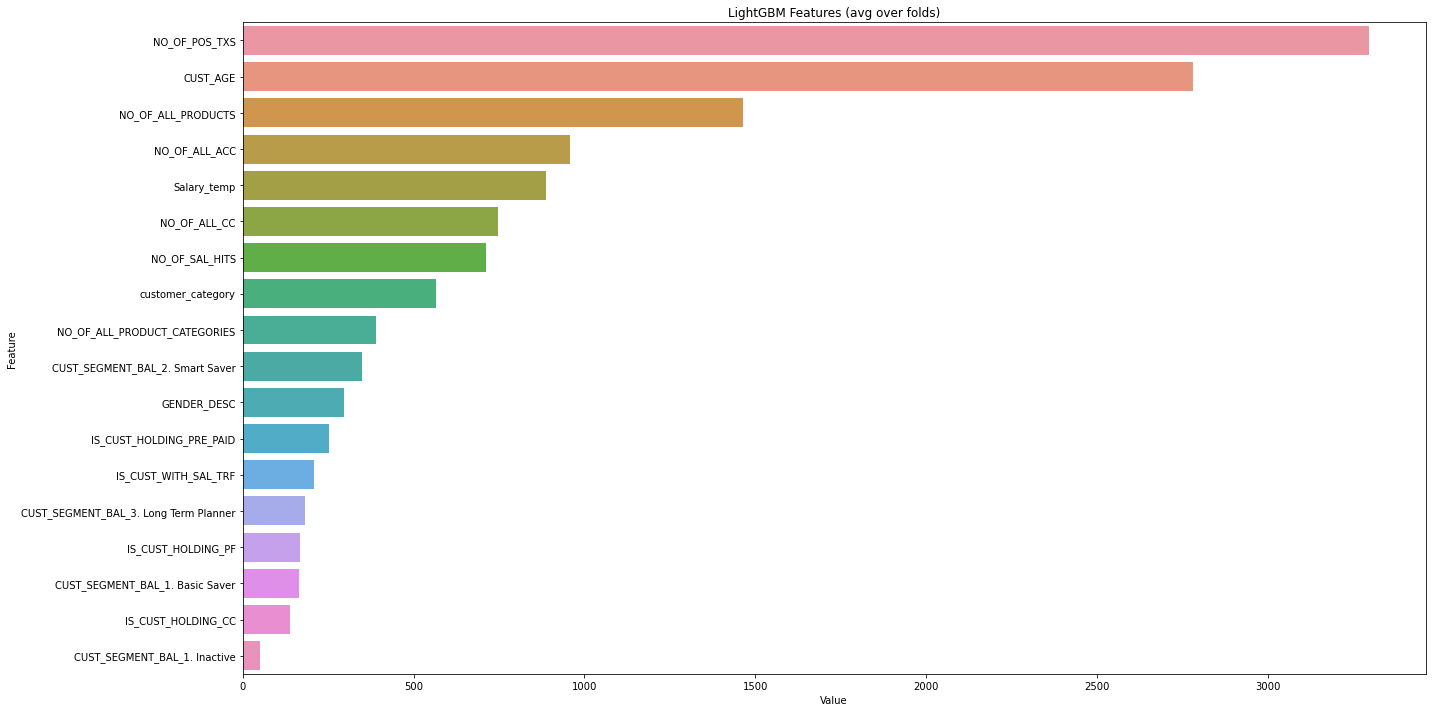

In [27]:
feature_importances(clf)

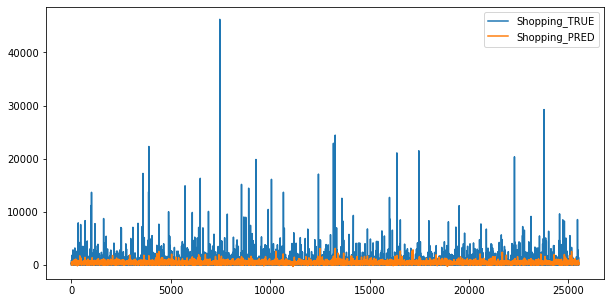

In [28]:
d.plot(figsize=(10,5))
plt.show()

# Groceries

In [29]:
d,clf = model(X,df['Groceries'])
d_all.append(d)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
opt_parameters: {'colsample_bytree': 0.718108248680929, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 133, 'min_child_weight': 0.1, 'n_estimators': 1000, 'num_leaves': 49, 'reg_alpha': 100, 'reg_lambda': 50, 'subsample': 0.2969255387989256}
gs.best_score: 0.12871227332575733


In [30]:
performance(d)

RMSE: 137.3849031628824
MSE: 18874.611617074574


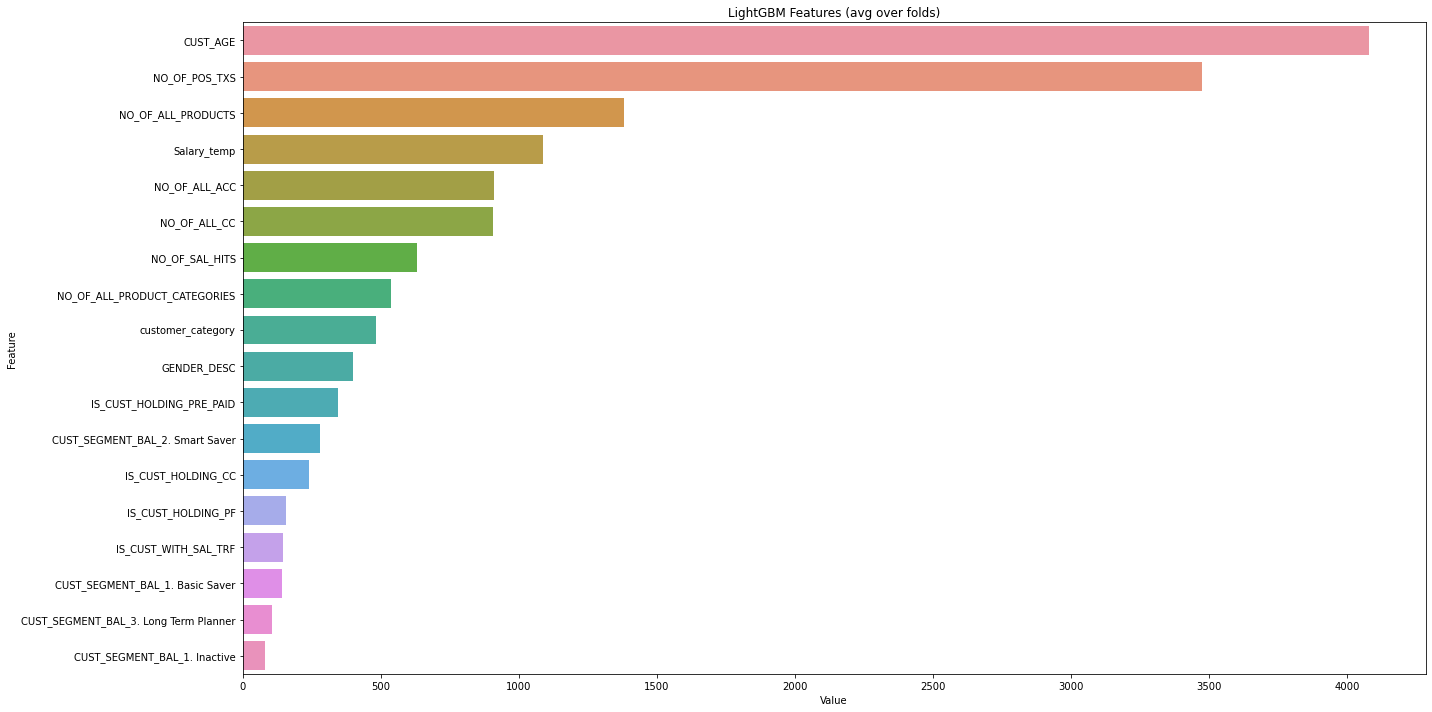

In [31]:
feature_importances(clf)

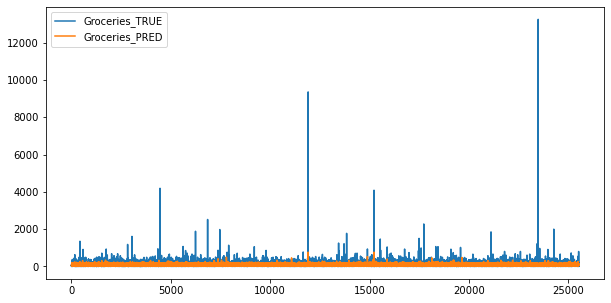

In [32]:
d.plot(figsize=(10,5))
plt.show()

# Transportation

In [33]:
d,clf = model(X,df['Transportation'])
d_all.append(d)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
opt_parameters: {'colsample_bytree': 0.9728042686017861, 'learning_rate': 0.04, 'max_depth': 1, 'min_child_samples': 325, 'min_child_weight': 100.0, 'n_estimators': 600, 'num_leaves': 27, 'reg_alpha': 100, 'reg_lambda': 0, 'subsample': 0.8783590861700734}
gs.best_score: 0.008317806816806902


In [34]:
performance(d)

RMSE: 705.7809254819414
MSE: 498126.7147741456


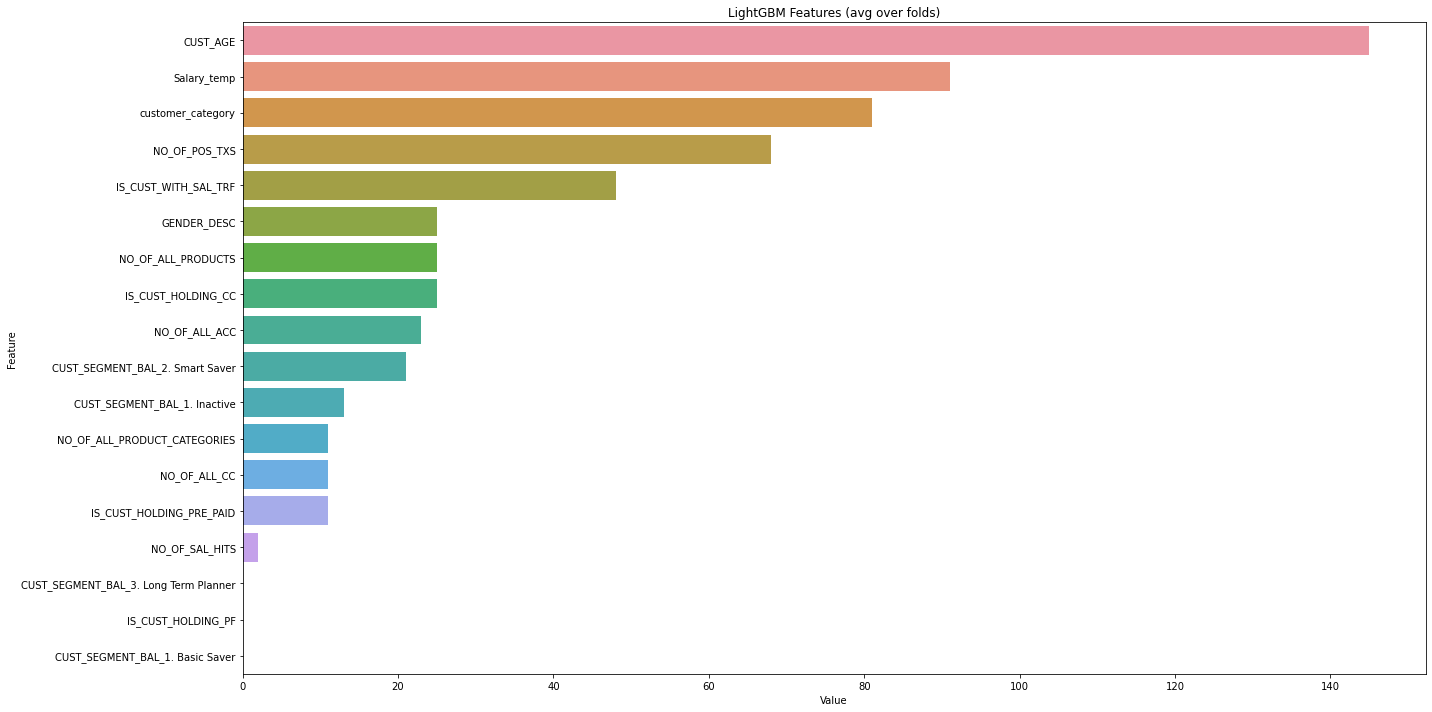

In [35]:
feature_importances(clf)

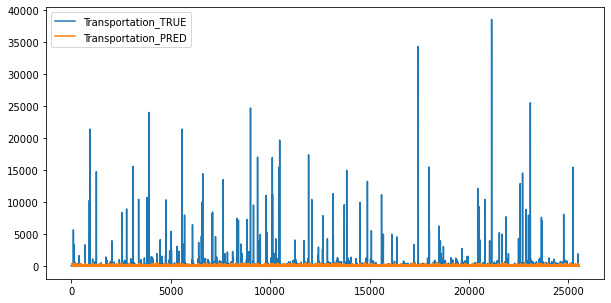

In [36]:
d.plot(figsize=(10,5))
plt.show()

# Health

In [37]:
d,clf = model(X,df['Health'])
d_all.append(d)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
opt_parameters: {'colsample_bytree': 0.9870576100176972, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_samples': 191, 'min_child_weight': 1000.0, 'n_estimators': 600, 'num_leaves': 9, 'reg_alpha': 7, 'reg_lambda': 10, 'subsample': 0.7347737706317621}
gs.best_score: 0.013992164077591704


In [38]:
performance(d)

RMSE: 228.8836893996391
MSE: 52387.74327319046


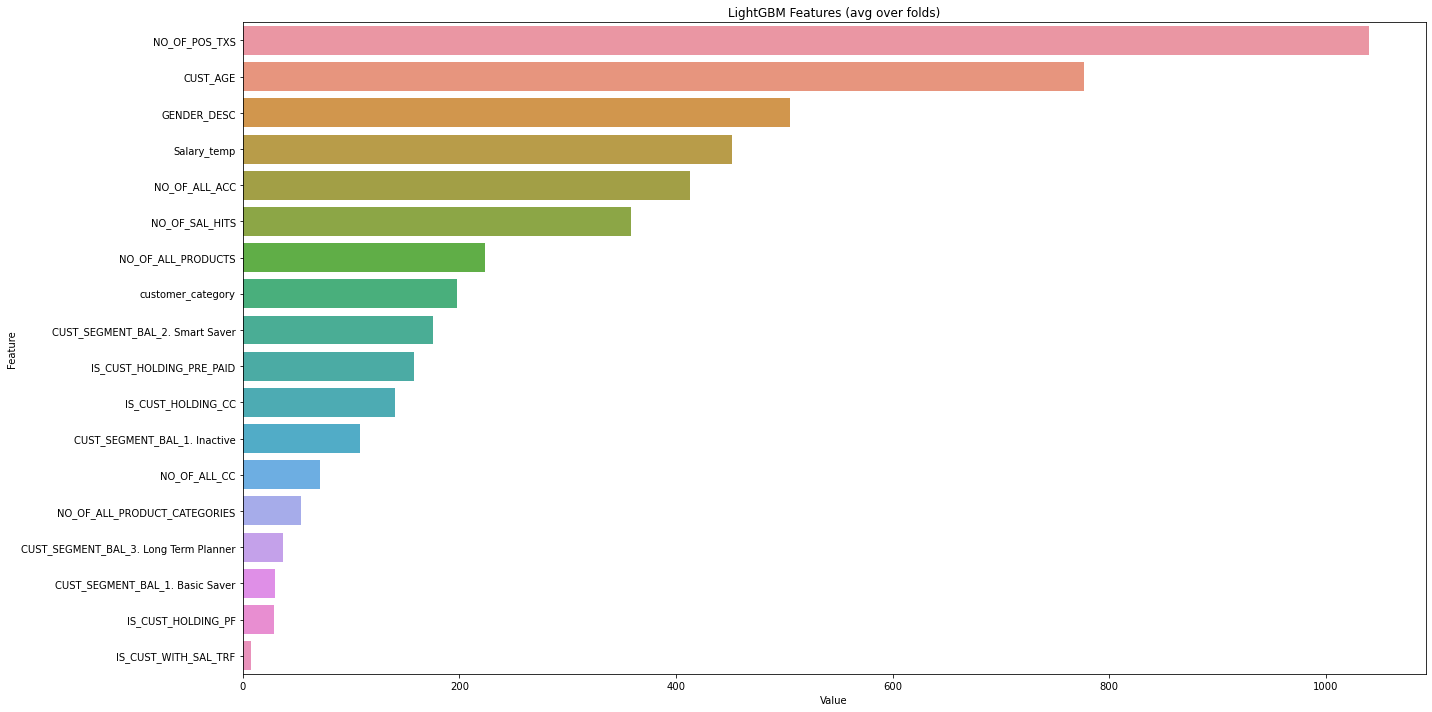

In [39]:
feature_importances(clf)

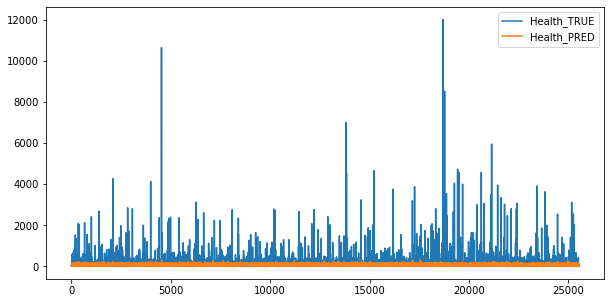

In [40]:
d.plot(figsize=(10,5))
plt.show()

# Utilities

In [41]:
d,clf = model(X,df['Utilities'])
d_all.append(d)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
opt_parameters: {'colsample_bytree': 0.8460330392946156, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_samples': 188, 'min_child_weight': 1, 'n_estimators': 100, 'num_leaves': 33, 'reg_alpha': 5, 'reg_lambda': 20, 'subsample': 0.7090544902444216}
gs.best_score: 0.0234224003243297


In [42]:
performance(d)

RMSE: 277.5030224420837
MSE: 77007.92746449161


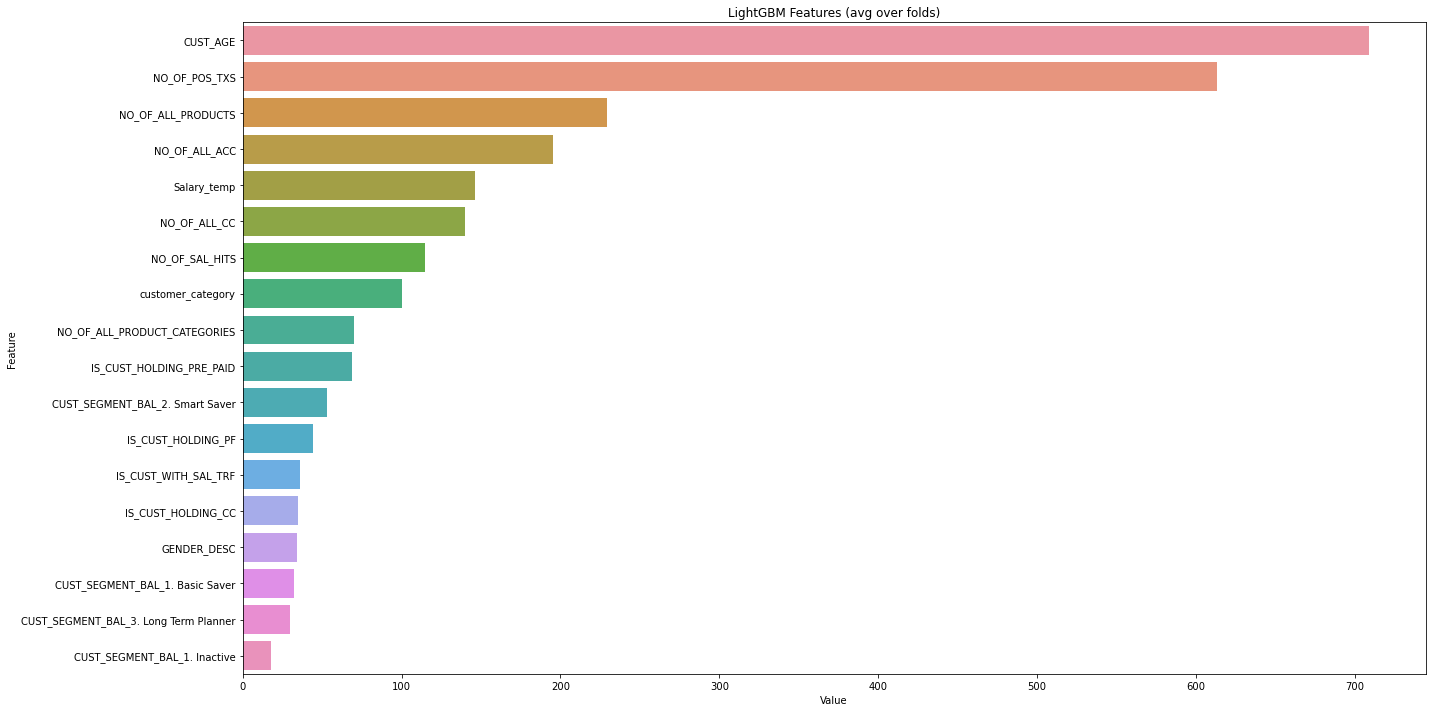

In [43]:
feature_importances(clf)

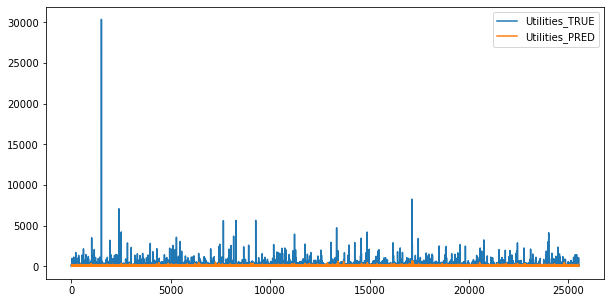

In [44]:
d.plot(figsize=(10,5))
plt.show()

# DiningOut

In [45]:
d,clf = model(X,df['DiningOut'])
d_all.append(d)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
opt_parameters: {'colsample_bytree': 0.671595425930391, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_samples': 201, 'min_child_weight': 1000.0, 'n_estimators': 400, 'num_leaves': 27, 'reg_alpha': 7, 'reg_lambda': 50, 'subsample': 0.272063679817216}
gs.best_score: 0.07565155116230737


In [46]:
performance(d)

RMSE: 144.09634967973045
MSE: 20763.75799102315


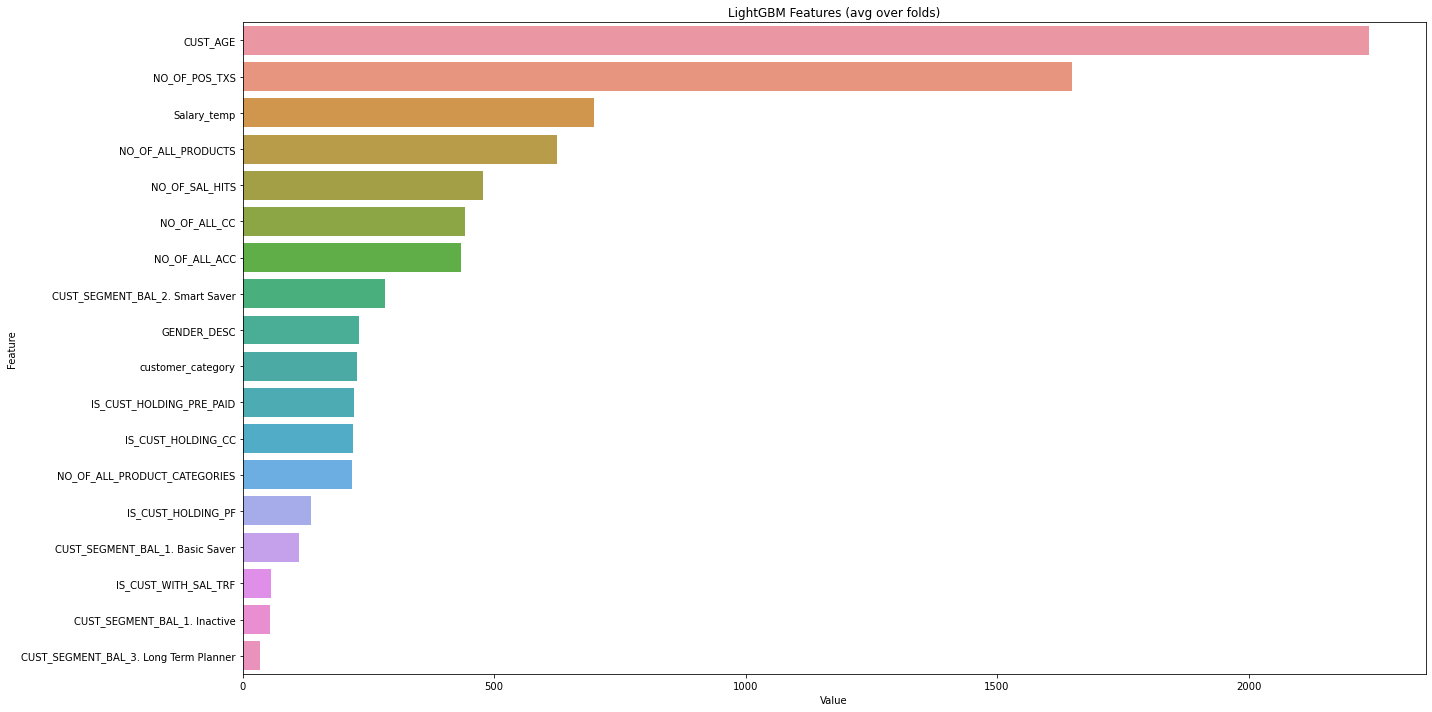

In [47]:
feature_importances(clf)

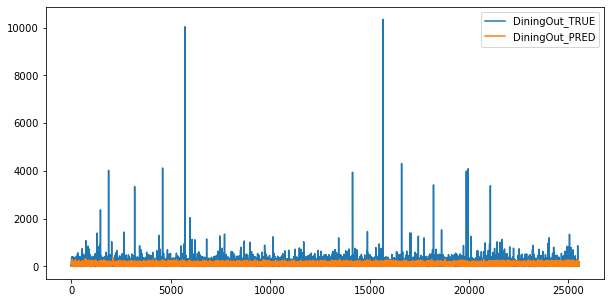

In [48]:
d.plot(figsize=(10,5))
plt.show()

# BillsAndServices

In [49]:
d,clf = model(X,df['BillsAndServices'])
d_all.append(d)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
opt_parameters: {'colsample_bytree': 0.718108248680929, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 133, 'min_child_weight': 0.1, 'n_estimators': 1000, 'num_leaves': 49, 'reg_alpha': 100, 'reg_lambda': 50, 'subsample': 0.2969255387989256}
gs.best_score: 0.038526750151048596


In [50]:
performance(d)

RMSE: 351.5446582547891
MSE: 123583.64674747645


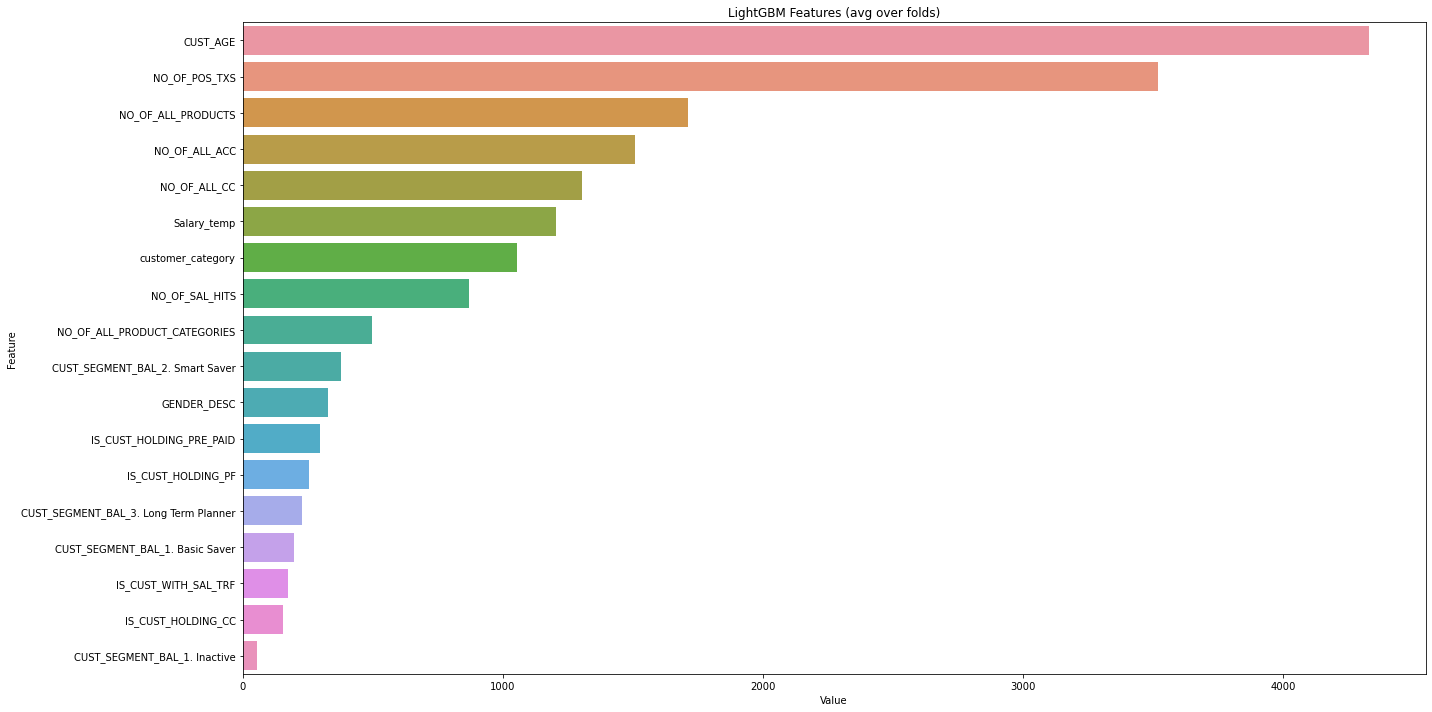

In [51]:
feature_importances(clf)

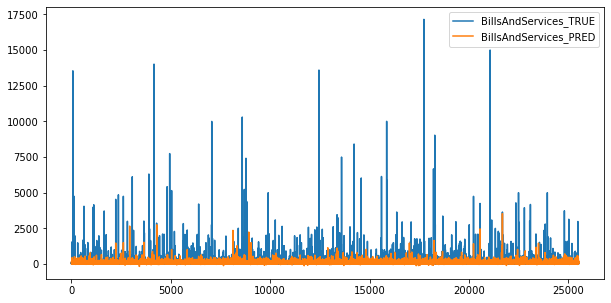

In [52]:
d.plot(figsize=(10,5))
plt.show()

# Entertainment

In [53]:
d,clf = model(X,df['Entertainment'])
d_all.append(d)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
opt_parameters: {'colsample_bytree': 0.671595425930391, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_samples': 201, 'min_child_weight': 1000.0, 'n_estimators': 400, 'num_leaves': 27, 'reg_alpha': 7, 'reg_lambda': 50, 'subsample': 0.272063679817216}
gs.best_score: 0.03749300006050149


In [54]:
performance(d)

RMSE: 697.98141883254
MSE: 487178.06103548576


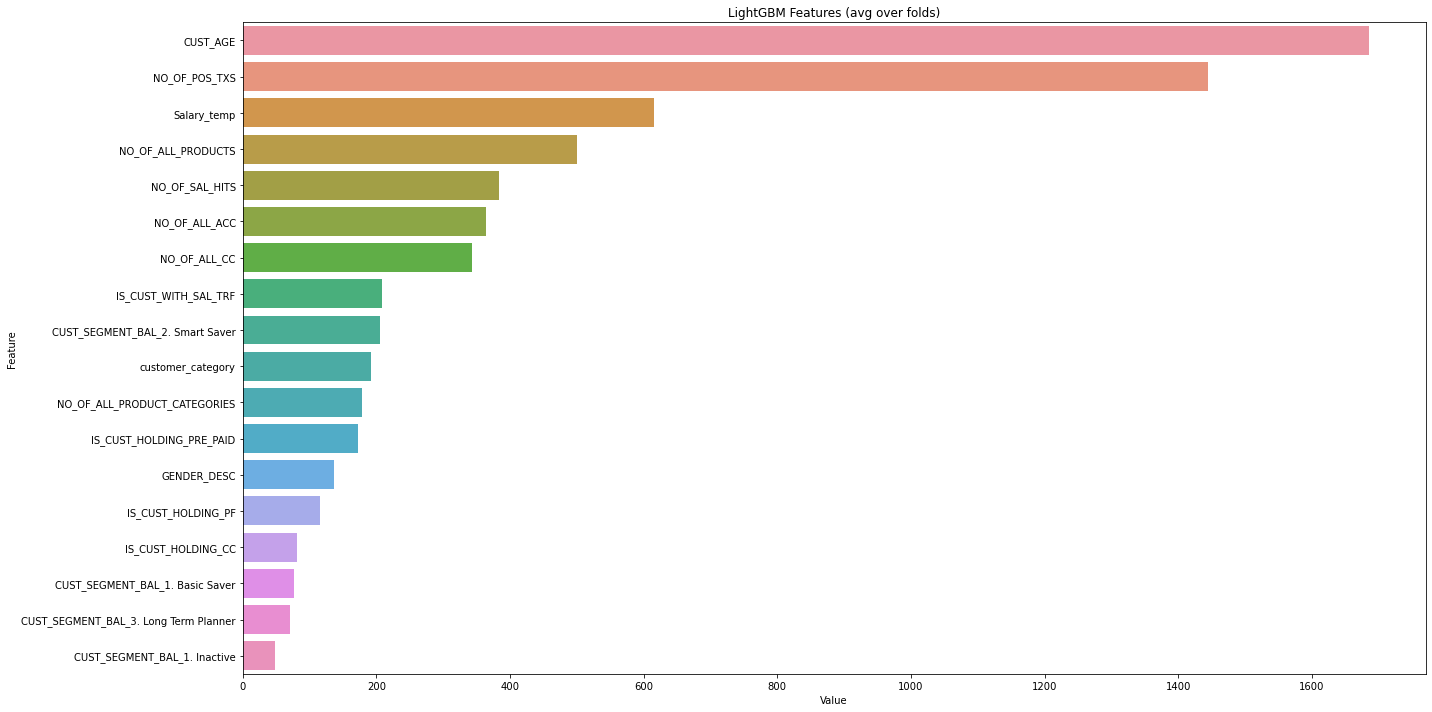

In [55]:
feature_importances(clf)

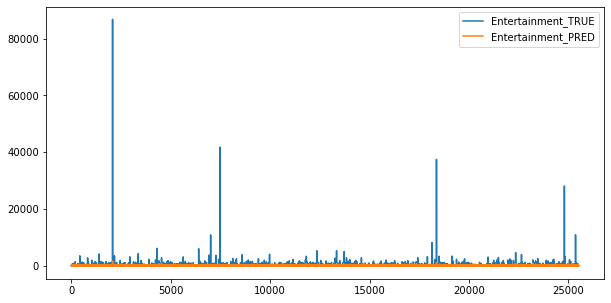

In [56]:
d.plot(figsize=(10,5))
plt.show()

# OVERALL Dataframe

In [63]:
result = pd.concat(d_all,axis=1)
result

,Shopping_TRUE,Shopping_PRED,Groceries_TRUE,Groceries_PRED,Transportation_TRUE,Transportation_PRED,Health_TRUE,Health_PRED,Utilities_TRUE,Utilities_PRED,DiningOut_TRUE,DiningOut_PRED,BillsAndServices_TRUE,BillsAndServices_PRED,Entertainment_TRUE,Entertainment_PRED
0,7.000000,95.895730,60.045000,50.309307,33.500000,48.575117,23.000000,36.315417,6.000000,40.947435,11.050000,32.683466,43.826883,34.607930,27.160839,39.834866
1,216.200000,263.453618,63.805000,44.902685,14.000000,93.183153,14.550000,65.158096,94.800000,67.860374,76.175000,100.203669,17.490000,76.807301,27.160839,52.858039
2,380.454367,399.216979,6.740000,109.765794,6.900000,130.715093,11.990000,69.836970,43.900000,85.937858,97.227064,86.279391,110.098234,187.278126,87.941553,97.897883
3,33.000000,131.168490,73.845000,43.503374,7.500000,54.866888,23.000000,56.858684,62.050000,54.707314,47.400000,65.839036,43.826883,38.757451,27.160839,41.495402
4,943.880000,120.131261,30.175000,49.465263,34.886007,65.430957,51.128921,43.802448,265.000000,48.045943,8.400000,45.082426,3.000000,35.545296,395.750000,45.958453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25514,125.590000,404.422923,802.415000,120.181139,73.300000,128.852162,6.145000,89.910105,80.249438,86.856329,122.178000,106.496173,55.900000,95.312025,87.941553,266.409308
25515,3.750000,379.551587,44.715000,40.442462,34.886007,76.533907,121.860000,84.615337,51.100000,81.601679,102.310000,179.644133,32.456000,39.139192,27.160839,88.737279
25516,380.454367,278.181184,108.118005,98.019845,84.970659,129.461539,81.613269,79.748357,25.812000,68.303943,97.227064,71.631713,110.098234,120.544316,87.941553,145.717858
25517,207.774604,77.495601,28.235000,31.968539,25.500000,57.292291,27.250000,34.041199,46.959834,44.591201,39.635000,32.330248,14.500000,34.952315,27.160839,29.135671
